# Introduction
In this project, I'll explore a dataset that describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

For example, if the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (meaning one euro has more value than one US dollar at this exchange rate).

The dataset was compiled by Daria Chemkaeva and made available on Kaggle, with the data source being the European Central Bank. It's worth noting that the dataset receives regular updates, and was downloaded it in January 2021.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head())
print(exchange_rates.tail())
exchange_rates.info()

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [2]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# Isolate the 'Time' and 'US_dollar' columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

# Run the Series.value_counts() method on the US_dollar column
print(euro_to_dollar['US_dollar'].value_counts())

# Drop all rows where the '-' character appears in the US_dollar column
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# Convert the US_dollar column to a float data type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

-         62
1.2276     9
1.1215     8
1.1305     7
1.3086     6
          ..
0.9687     1
1.5423     1
0.8913     1
0.8701     1
1.0229     1
Name: US_dollar, Length: 3528, dtype: int64


# Rolling Mean

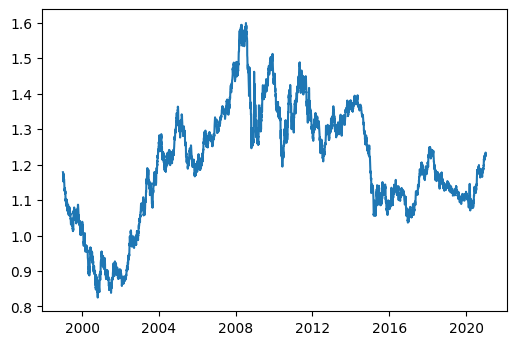

In [3]:
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()



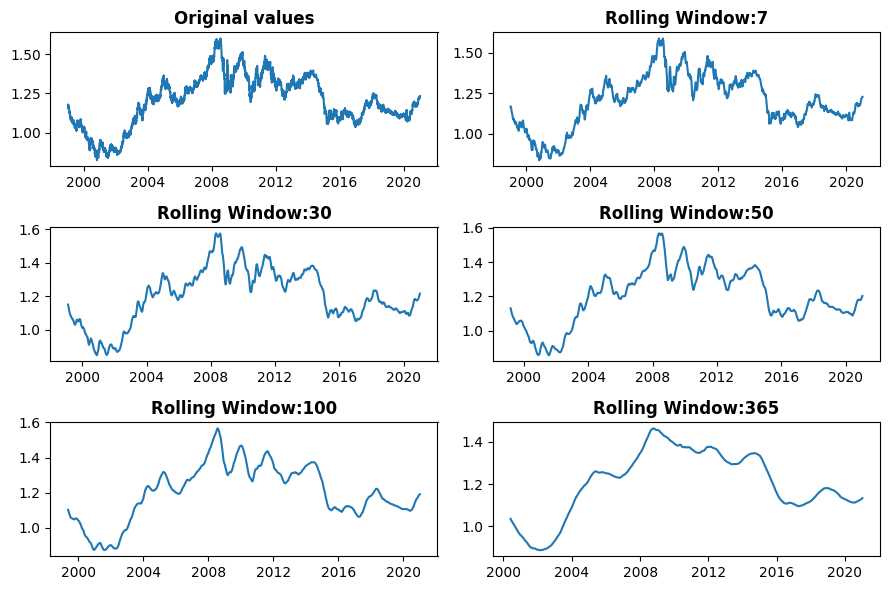

In [4]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [5]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


### Importance of Calculating Rolling Mean

In time series analysis, calculating the rolling mean (or moving average) is a common technique used to smooth out short-term fluctuations and identify long-term trends in the data. The rolling mean is calculated by taking the average of a specified number of consecutive data points within a moving window.

Here's why we calculated the rolling mean:

1. **Smoothing Out Fluctuations**: The rolling mean helps to smooth out short-term fluctuations or noise in the data, making it easier to identify underlying trends or patterns.

2. **Highlighting Trends**: By averaging data over a specified window size, the rolling mean helps to reveal longer-term trends or patterns that may be obscured by short-term variability.

3. **Identifying Anomalies**: Sudden spikes or dips in the data that deviate significantly from the rolling mean can indicate potential anomalies or outliers that may warrant further investigation.

4. **Forecasting**: The rolling mean can be used as a basis for forecasting future values in the time series, providing a simple yet effective method for predicting trends or estimating future values.

Overall, calculating the rolling mean is a valuable tool in time series analysis for smoothing data, identifying trends, detecting anomalies, and making informed forecasts.

# Story Idea: Comparing Euro-Dollar Rate Changes Under the Last Three US Presidents

I would like to explore how the euro-dollar exchange rate changed during the presidencies of the last three US presidents: George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021). This story will provide insights into how the exchange rate fluctuated under different presidential administrations and potentially uncover any trends or patterns associated with each presidency. 

Using a line plot, I will visualize the euro-dollar exchange rate over time, highlighting the periods corresponding to each presidency. By comparing these trends, I aim to identify any notable shifts in the exchange rate and examine potential factors influencing these changes, such as economic policies, global events, and market sentiment.

This storytelling visualization will offer valuable insights into the relationship between US presidential administrations and currency exchange rates, providing a nuanced understanding of how political factors may impact financial markets.

In [6]:
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]



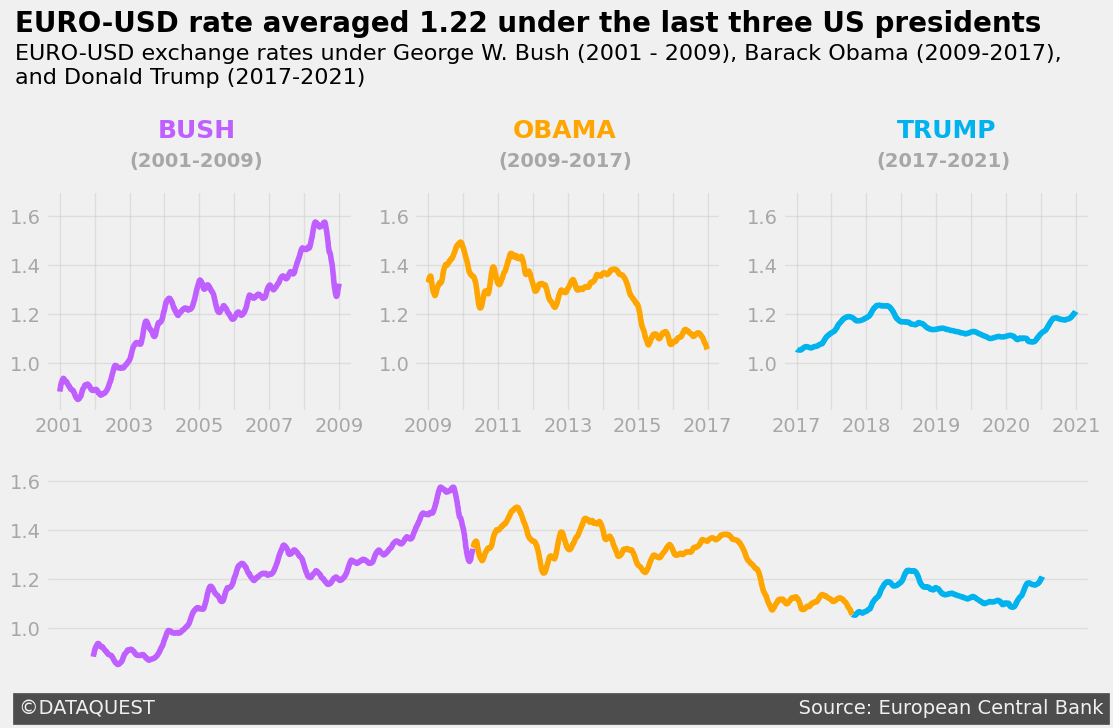

In [7]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(729916.0, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()